<a href="https://colab.research.google.com/github/shravani2022/Project/blob/main/metal_casting_withpython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("/content/Copy of metal_casting_data(1).csv")
data

,timestamp,temperature,pressure,cooling_rate,defect
0,01-01-2023,1474.91,169.82,1.33,NaN
1,01-01-2023,1590.14,153.61,2.94,NaN
2,01-01-2023,1546.40,130.95,4.43,NaN
3,01-01-2023,1519.73,181.38,3.80,NaN
4,01-01-2023,1431.20,168.47,4.13,NaN
...,...,...,...,...,...
495,11-01-2023,1470.67,109.16,3.51,NaN
496,11-01-2023,1516.73,191.73,3.29,Shrinkage
497,11-01-2023,1415.55,113.68,2.59,NaN
498,11-01-2023,1594.88,195.02,2.21,NaN


In [4]:
data.dropna(inplace=True)
data

,timestamp,temperature,pressure,cooling_rate,defect
9,01-01-2023,1541.61,172.57,2.70,Crack
10,01-01-2023,1404.12,161.34,1.50,Porosity
11,01-01-2023,1593.98,141.82,4.94,Crack
12,01-01-2023,1566.49,193.27,4.75,Shrinkage
17,01-01-2023,1504.95,181.06,3.06,Porosity
...,...,...,...,...,...
486,11-01-2023,1409.09,168.84,2.28,Crack
489,11-01-2023,1578.05,181.91,2.52,Crack
490,11-01-2023,1491.13,179.94,1.57,Crack
494,11-01-2023,1492.74,136.10,3.22,Crack


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 9 to 496
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     146 non-null    object 
 1   temperature   146 non-null    float64
 2   pressure      146 non-null    float64
 3   cooling_rate  146 non-null    float64
 4   defect        146 non-null    object 
dtypes: float64(3), object(2)
memory usage: 10.9+ KB


In [5]:
data.describe()

,temperature,pressure,cooling_rate
count,146.000000,146.000000,146.000000
mean,1503.559521,149.410411,2.989795
std,62.955075,27.642279,1.323708
min,1401.100000,102.540000,0.580000
25%,1450.710000,124.845000,1.735000
50%,1503.520000,150.030000,3.255000
75%,1562.425000,173.787500,4.090000
max,1598.590000,199.660000,4.980000


In [10]:
data["cooling_rate"] = data["cooling_rate"].astype(int)
data

,timestamp,temperature,pressure,cooling_rate,defect
9,01-01-2023,1541.61,172.57,2,Crack
10,01-01-2023,1404.12,161.34,1,Porosity
11,01-01-2023,1593.98,141.82,4,Crack
12,01-01-2023,1566.49,193.27,4,Shrinkage
17,01-01-2023,1504.95,181.06,3,Porosity
...,...,...,...,...,...
486,11-01-2023,1409.09,168.84,2,Crack
489,11-01-2023,1578.05,181.91,2,Crack
490,11-01-2023,1491.13,179.94,1,Crack
494,11-01-2023,1492.74,136.10,3,Crack


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Prepare data
X = data[['temperature', 'pressure', 'cooling_rate']]
y = data['defect']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.26666666666666666


In [20]:
#decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = data[['temperature', 'pressure', 'cooling_rate']]
y = data['defect']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluate model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.36666666666666664


In [24]:
#Navie Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = data[['temperature', 'pressure', 'cooling_rate']]
y = data['defect']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = GaussianNB()
model.fit(X_train, y_train)

# Evaluate model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.3


In [26]:
#ANN
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = data[['temperature', 'pressure', 'cooling_rate']]
y = data['defect']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = MLPClassifier()
model.fit(X_train, y_train)

# Evaluate model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.3333333333333333


In [27]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [28]:
X = data[['temperature', 'pressure', 'cooling_rate']]
y = data['defect']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Evaluate model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.43333333333333335


In [31]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Artificial Neural Network": MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42),
    "K-Nearest Neighbor": KNeighborsClassifier(n_neighbors=3)
}

# Train models, make predictions and calculate accuracies
accuracies = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracies[model_name] = accuracy_score(y_test, y_pred)

# Print the accuracies of all models
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: Accuracy = {accuracy:.4f}")

Random Forest: Accuracy = 0.3000
Decision Tree: Accuracy = 0.4000
Naive Bayes: Accuracy = 0.3000
Artificial Neural Network: Accuracy = 0.5333
K-Nearest Neighbor: Accuracy = 0.3000


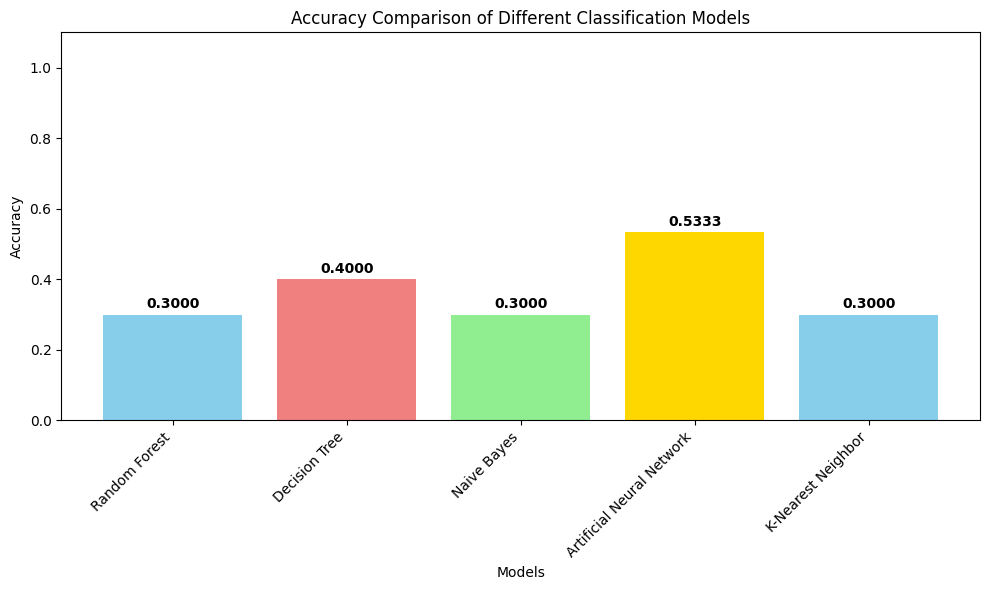

In [32]:
import matplotlib.pyplot as plt


models = list(accuracies.keys())
accuracies_values = list(accuracies.values())


plt.figure(figsize=(10, 6))
plt.bar(models, accuracies_values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Classification Models")
plt.ylim(0, 1.1)
plt.xticks(rotation=45, ha='right')


for i, v in enumerate(accuracies_values):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [34]:
import seaborn as sns


<ipython-input-41-3c1da2943a9a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='defect',palette = "viridis")


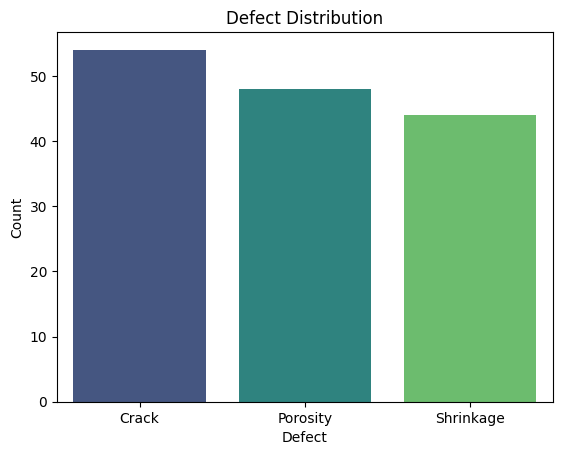

In [41]:
sns.countplot(data=data, x='defect',palette = "viridis")
plt.xlabel("Defect")
plt.ylabel("Count")
plt.title("Defect Distribution")
plt.show()

Text(0.5, 1.0, 'Defect Distribution')

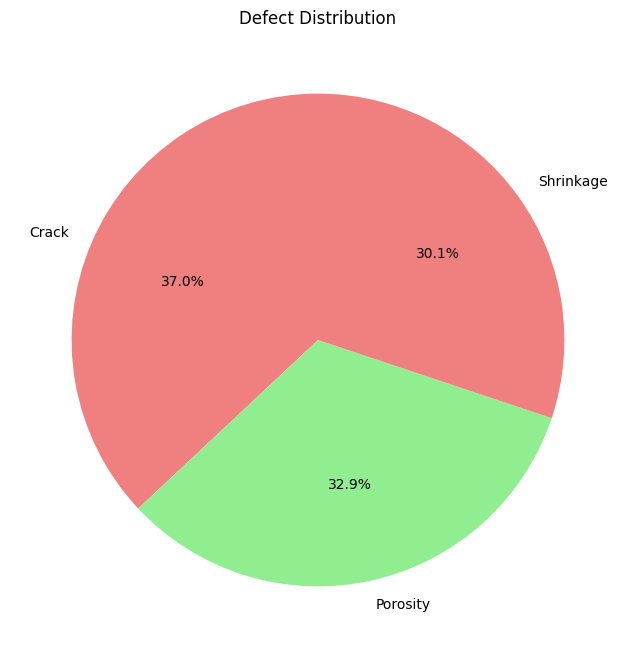

In [43]:
#defect vs count
defect_counts = data['defect'].value_counts()
defect_counts
#pie
plt.figure(figsize=(8, 8))
plt.pie(defect_counts, labels=defect_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Defect Distribution')

<ipython-input-44-ecfb1b9e04c0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='defect', y='temperature', data=data, palette='viridis')


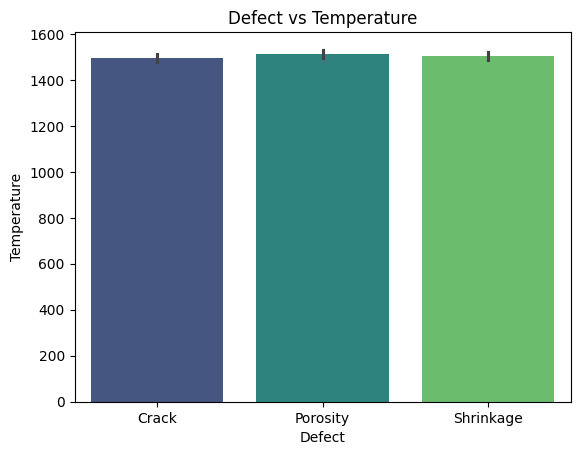

In [44]:
sns.barplot(x='defect', y='temperature', data=data, palette='viridis')
plt.xlabel('Defect')
plt.ylabel('Temperature')
plt.title('Defect vs Temperature')
plt.show()

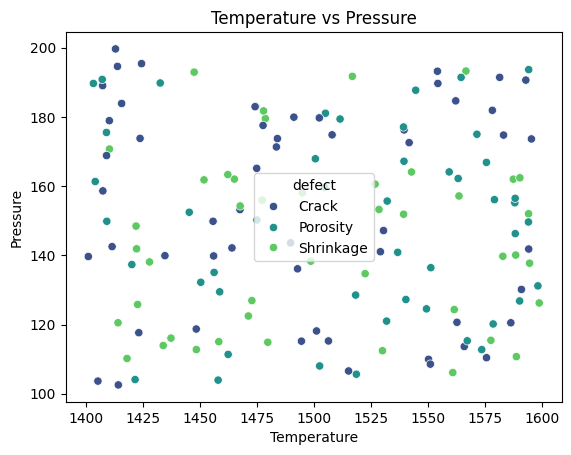

In [45]:
sns.scatterplot(x='temperature', y='pressure', hue='defect', data=data, palette='viridis')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title('Temperature vs Pressure')
plt.show()
#

<ipython-input-46-36dd3b20d1a1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='defect', y='cooling_rate', data=data, palette='viridis')


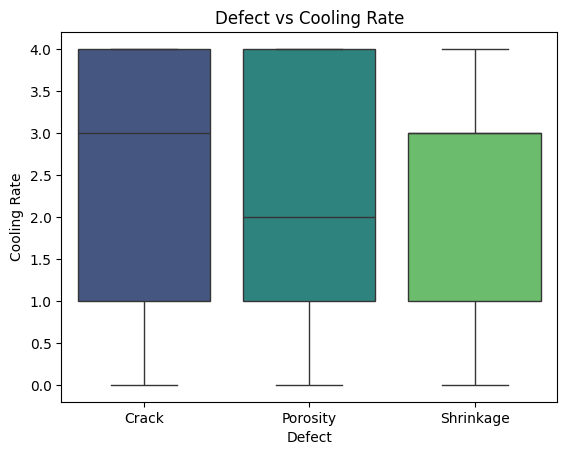

In [46]:
sns.boxplot(x='defect', y='cooling_rate', data=data, palette='viridis')
plt.xlabel('Defect')
plt.ylabel('Cooling Rate')
plt.title('Defect vs Cooling Rate')
plt.show()
#

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

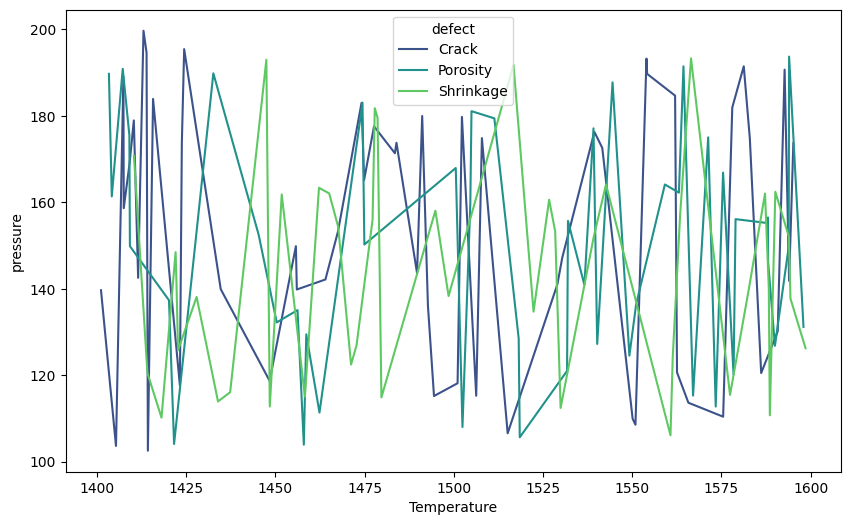

In [47]:
#lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='temperature', y='pressure', data=data, hue='defect', palette='viridis')
plt.xlabel('Temperature')
plt

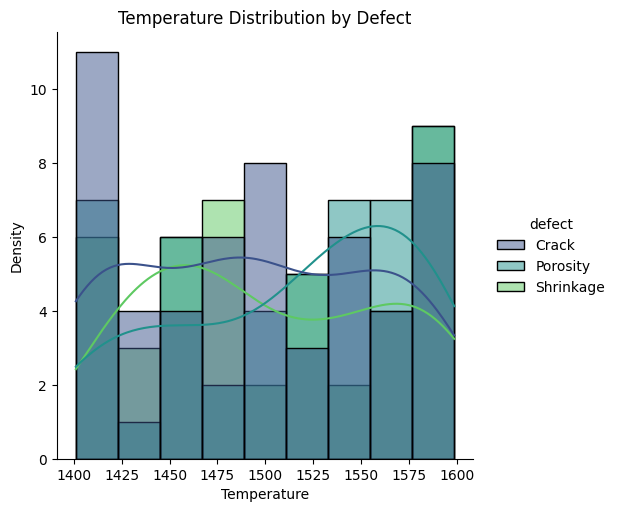

In [49]:
#displot
sns.displot(data=data, x='temperature', hue='defect', kde=True, palette='viridis')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.title('Temperature Distribution by Defect')
plt.show()